In [ ]:
import time
import h5py
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import gzip
import pickle
import random

In [ ]:
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


def backprop(x, y, biases, weights, num_layers):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    
    # 初始化空偏置值集合和空权重集合
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # feedforward前馈
    # x为单一训练样本
    activation = x
    activations = [x] # list to store all the activations, layer by layer
    # 存储所有z向量集合 z = (a * w + b)
    zs = [] # list to store all the z vectors, layer by layer
    
    # 用初始化的随机偏置集和权重集逐层进行计算
    for b, w in list(zip(biases, weights)):
        z = np.dot(w, activation)+b
        # 记录了神经网络中每层的计算结果的值
        zs.append(z)
        
        # 为了理解和感知器模型的相似性，假设z ≡ w ·x + b 是一个很大的正数。那么e−z≈ 0 而
        # σ(z) ≈1。即，当z = w ·x + b 很大并且为正，S型神经元的输出近似为1，正好和感知器一样。
        # 相反地，假设z = w ·x + b 是一个很大的负数。那么e−z→∞，σ(z) ≈0。所以当z = w ·x + b
        # 是一个很大的负数，S型神经元的行为也非常近似一个感知器。只有在w ·x + b 取中间值时，和感知器模型有比较大的偏离。
        
        # 计算每层激活值
        activation = sigmoid(z)
        # 记录每层神经元的激活值
        activations.append(activation)
        
    # backward pass 反向传播
    # sigmoid_prime 是 sigmoid方程的求导，表示了对结果影响的程度大小
    # cost_derivative 求出计算结果与训练集中给出对应结果的差值
    # delta 表示这个偏差对结果影响的程度的值
    delta = cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
    # 这个值可以直接在偏置量上进行加减运算，即偏置量的梯度
    nabla_b[-1] = delta
    # 求权重的梯度
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())
    # Note that the variable l in the loop below is used a little
    # differently to the notation in Chapter 2 of the book.  Here,
    # l = 1 means the last layer of neurons, l = 2 is the
    # second-last layer, and so on.  It's a renumbering of the
    # scheme in the book, used here to take advantage of the fact
    # that Python can use negative indices in lists.
    
    # l = 1 表示最后一层神经元，l = 2 是倒数第二层神经元, 依此类推.
    for l in range(2, num_layers):
        z = zs[-l]
        sp = sigmoid_prime(z)
        delta = np.dot(weights[-l+1].transpose(), delta) * sp
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
    return (nabla_b, nabla_w)


def evaluate(test_data, biases, weights):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    test_results = [(np.argmax(feedforward(x, biases, weights)), y)
                    for (x, y) in test_data]
    return sum(int(x == y) for (x, y) in test_results)

def cost_derivative(output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

def feedforward(a, biases, weights):
    """Return the output of the network if ``a`` is input."""
    for b, w in zip(biases, weights):
        a = sigmoid(np.dot(w, a)+b)
    return a

50000
10000
10000
<class 'numpy.ndarray'>
Epoch 0: 4590 / 10000
Epoch 1: 5227 / 10000
Epoch 2: 5963 / 10000
Epoch 3: 6587 / 10000


KeyboardInterrupt: 

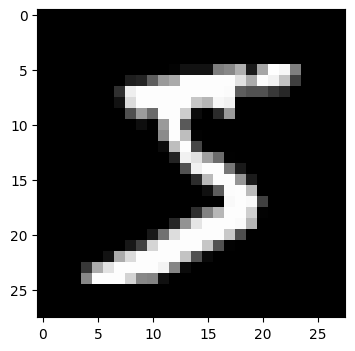

In [3]:
np.random.seed(1)

# load data
f = gzip.open('data_sets/mnist.pkl.gz', "rb")  
training_data, validation_data, test_data = pickle.load(f,encoding='iso-8859-1')  
f.close()  

# 训练数据集由shape(50000,784)转换成len=50000,shape(784,1)的列表
training_inputs = [np.reshape(x, (784, 1)) for x in training_data[0]]
# 此步骤将数据集对应结果由shape(50000,)转换成len=50000,shape(10,1)的列表，数组中的值为1/0
training_results = [vectorized_result(y) for y in training_data[1]]
# 此步骤将数据集与结果整合为一个数组，数组格式为len=50000的列表，每项为len=2的列表，第一项为数据集第一项shape(784,1)，第二项为结果标识shape(10,1)
vtraining_data = list(zip(training_inputs, training_results))

# 验证数据集
validation_inputs = [np.reshape(x, (784, 1)) for x in validation_data[0]]
validation_data = list(zip(validation_inputs, validation_data[1]))

# 测试数据集
test_inputs = [np.reshape(x, (784, 1)) for x in test_data[0]]
test_data = list(zip(test_inputs, test_data[1]))

print(len(training_inputs))
print(len(validation_inputs))
print(len(test_inputs))
 
# 显示数据集图片
img = training_inputs[0]
# img = validation_inputs[0]
# img = training_inputs[1]
img = img.reshape(28,-1)
print(type(img))

# 设置图形
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.imshow(img)

# 创建三层神经网络，第一层（输入层）784个神经元，第二层（隐藏层）30个神经元，第三层（输出层）10个神经元
sizes = [784,30,10]
num_layers = len(sizes)
# 为第一层和第二层神经元设置偏置值，列表len=2，第一项为第一层偏置值shape(30,1)，第二项为第二层偏置值shape(10,1)，并填充均值为0，标准差为1的高斯分布随机数
biases = [np.random.randn(y, 1) for y in sizes[1:]]
# 为第一层和第二层神经元设置权重，列表len=2，第一项为第一层权重shape(30,784)，第二项为第二层权重shape(10,30)，并填充均值为0，标准差为1的高斯分布随机数
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

# print(sizes, num_layers, biases, weights)

# 训练总次数
epochs = 30
# 最每次训练小样本集大小
mini_batch_size = 10
# 学习率
eta = 0.1

# 测试数据集不为空，则获取测试数据集数量
if test_data: 
    n_test = len(test_data)
# vtraining_data = vtraining_data[0:1000]
# 获取训练数据集数量
n = len(vtraining_data)
# 开始训练
for j in range(epochs):
    # 打乱训练数据集顺序
    random.shuffle(vtraining_data)
    # 组装每次训练数据集
    mini_batches = [
        vtraining_data[k:k+mini_batch_size]
        for k in range(0, n, mini_batch_size)]
    # 开始训练
    for mini_batch in mini_batches:
        # print(mini_batch)
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the lwearning rate."""
        # 初始化反向传播偏置值集合
        nabla_b = [np.zeros(b.shape) for b in biases]
        # 初始化反向传播权重集合
        nabla_w = [np.zeros(w.shape) for w in weights]
        for x, y in mini_batch:
            # 传入训练数据，累积每次计算偏移量
            delta_nabla_b, delta_nabla_w = backprop(x, y, biases, weights, num_layers  )
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        # 定义学习率计算累积偏移量的影响，并用当前偏移量减去影响实现梯度下降
        weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(weights, nabla_w)]
        biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(biases, nabla_b)]
        
        # 添加统计图表数据
        # nabla_ws.append(nabla_w[-1][0])
    # 显示图表并清空统计数据
    # matrix = np.full((30, len(nabla_ws)), np.arange(len(nabla_ws)))
    # plt.figure(figsize=(30, 12))
    # plt.plot(matrix.T,np.array(nabla_ws))
    # plt.show()
    # nabla_ws.clear()
    
    if test_data:
        print ("Epoch {0}: {1} / {2}".format(
        j, evaluate(test_data, biases, weights), n_test))
    else:
        print ("Epoch {0} complete".format(j))
        
# matrix = np.full((30, len(epoch_w)), np.arange(len(epoch_w)))
# plt.figure(figsize=(30, 12))
# plt.plot(matrix.T,np.array(nabla_ws))
# plt.show()

    